In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

2021.07.06

水汽通量垂直积分的绘图部分

从 shumflux_vi_count.ipynb 的预存数据中读取，进行绘图

2021.07.22

修改单位为kg * m-1 * s-1

In [2]:
dir_in = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/dyn/shum_flux/"
mod_list    = ['obs', 'vr', 'rcm']
season_list = ['am', 'jja']
# 读取水汽通量的垂直积分
uflux_vi = {}
vflux_vi = {}

for imod in mod_list:
    uflux_vi[imod]  = {}
    vflux_vi[imod]  = {}

    for iseason in season_list:
        uflux_vi[imod][iseason]  = xr.open_dataset(dir_in + "shum_uflux_"+iseason+".nc")[imod]
        vflux_vi[imod][iseason]  = xr.open_dataset(dir_in + "shum_vflux_"+iseason+".nc")[imod]

In [3]:
# 计算绘图的平均值
uflux_vi_mean = {} # 平均u方向水汽通量
vflux_vi_mean = {} # 平均v方向水汽通量
absflux_vi_mean = {} # 水汽通量大小，平均图
for imod in mod_list:
    uflux_vi_mean[imod] = {}
    vflux_vi_mean[imod] = {}
    absflux_vi_mean[imod] = {}
    for iseason in season_list:
        uflux_vi_mean[imod][iseason] = uflux_vi[imod][iseason].mean(axis=0) * 1e2 / 9.8 # 转换单位
        vflux_vi_mean[imod][iseason] = vflux_vi[imod][iseason].mean(axis=0) * 1e2 / 9.8
        absflux_vi_mean[imod][iseason] = np.sqrt(uflux_vi_mean[imod][iseason] ** 2 + vflux_vi_mean[imod][iseason] **2) 
# flux 等值线绘制大小

In [9]:
# 计算偏差的部分
uflux_vi_bias = {}
vflux_vi_bias = {}
absflux_vi_bias = {}
for imod in ['vr', 'rcm']:
    uflux_vi_bias[imod] = {}
    vflux_vi_bias[imod] = {}
    absflux_vi_bias[imod] = {}
    for iseason in season_list:
        uflux_vi_bias[imod][iseason]   = uflux_vi_mean[imod][iseason] - uflux_vi_mean['obs'][iseason]
        vflux_vi_bias[imod][iseason]   = vflux_vi_mean[imod][iseason] - vflux_vi_mean['obs'][iseason]
        absflux_vi_bias[imod][iseason] = absflux_vi_mean[imod][iseason] - absflux_vi_mean['obs'][iseason]

# 绘图部分

In [5]:
# 整理绘图所使用的坐标变量
lat  = uflux_vi['vr']['jja'].latitude
lon  = uflux_vi['vr']['jja'].longitude
time = uflux_vi['vr']['jja'].Time
time_am = uflux_vi['vr']['am'].Time
time_jja = uflux_vi['vr']['jja'].Time
# vr_uflux_sum_addcoords = xr.DataArray(vr_uflux_sum, coords=[time,lat,lon], name = "qv uflux").mean('Time')
# vr_vflux_sum_addcoords = xr.DataArray(vr_vflux_sum, coords=[time,lat,lon], name = "qv vflux").mean('Time')
# vr_flux_all = np.sqrt(vr_uflux_sum_addcoords ** 2 + vr_vflux_sum_addcoords ** 2 )

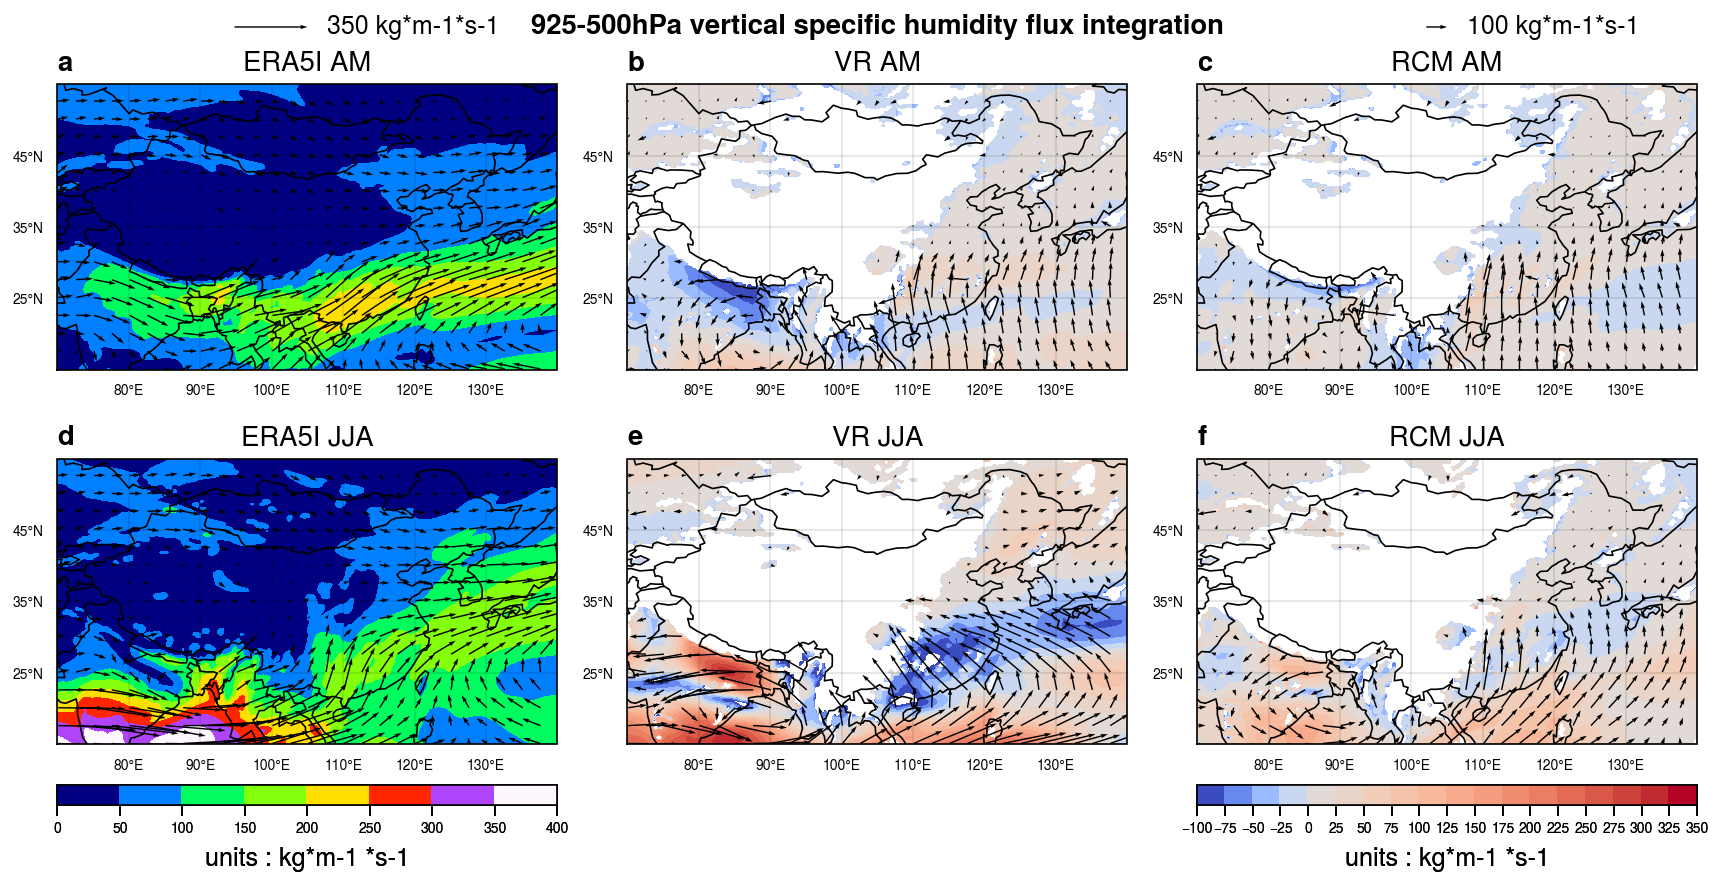

In [23]:
# import proplot as plot
from matplotlib import pyplot as plt
from matplotlib import colors
import proplot as plot

# cmap = "coolwarm"
cmap_mean = "gist_ncar"
cmap_bias = "coolwarm"
# ----- get filter vars coords-----

cticks = np.arange(0,550,25)
cticks_bias = np.arange(-100,375,25)
# move the center to zero (for cticks_bias)
divnorm=colors.TwoSlopeNorm(vmin=-100., vcenter=0., vmax=350)
# pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

#----- create plot -----
fig, axs = plot.subplots(ncols=3,nrows=2, proj=('cyl'))

scale_mean = 2400
scale_bias = 2400
axs[0].format(title='ERA5I AM')
m_contour= axs[0].contourf(lon, lat, absflux_vi_mean['obs']['am'], levels = cticks, cmap=cmap_mean)
m_quiver = axs[0].quiver(lon[::10], lat[::10], uflux_vi_mean['obs']['am'][::10,::10], vflux_vi_mean['obs']['am'][::10,::10],scale = scale_mean)
axs[0].quiverkey(m_quiver, 0.5, 1.2, label="350 kg*m-1*s-1", U=350, labelpos="E")

#-----vr-----
axs[1].format(title='VR AM')
m_contour= axs[1].contourf(lon, lat, absflux_vi_bias['vr']['am'], levels = cticks_bias, cmap=cmap_bias, norm = divnorm)
m_quiver = axs[1].quiver(lon[::10], lat[::10], uflux_vi_bias['vr']['am'][::10,::10], vflux_vi_mean['vr']['am'][::10,::10],scale = scale_bias)
#-----rcm -----
axs[2].format(title='RCM AM')
m_contour= axs[2].contourf(lon, lat, absflux_vi_bias['rcm']['am'], levels = cticks_bias, cmap=cmap_bias, norm = divnorm)
m_quiver = axs[2].quiver(lon[::10], lat[::10], uflux_vi_bias['rcm']['am'][::10,::10], vflux_vi_mean['rcm']['am'][::10,::10],scale = scale_bias)
axs[2].quiverkey(m_quiver, 0.5, 1.2, label="100 kg*m-1*s-1", U=100, labelpos="E")

axs[3].format(title='ERA5I JJA')
m_contour= axs[3].contourf(lon, lat, absflux_vi_mean['obs']['jja'], levels = cticks, cmap=cmap_mean)
m_quiver = axs[3].quiver(lon[::10], lat[::10], uflux_vi_mean['obs']['jja'][::10,::10], vflux_vi_mean['obs']['am'][::10,::10],scale = scale_mean)
axs[3].colorbar(m_contour, cmap=cmap,loc='b', width=0.1,ticklabelsize=5,ticks=cticks,label="units : kg*m-1 *s-1")

axs[4].format(title='VR JJA')
m_contour= axs[4].contourf(lon, lat, absflux_vi_bias['vr']['jja'], levels = cticks_bias, cmap=cmap_bias, norm = divnorm)
m_quiver = axs[4].quiver(lon[::10], lat[::10], uflux_vi_bias['vr']['jja'][::10,::10], vflux_vi_mean['vr']['am'][::10,::10],scale = scale_bias)

axs[5].format(title='RCM JJA')
m_contour= axs[5].contourf(lon, lat, absflux_vi_bias['rcm']['jja'], levels = cticks_bias, cmap=cmap_bias, norm = divnorm)
m_quiver = axs[5].quiver(lon[::10], lat[::10], uflux_vi_bias['rcm']['jja'][::10,::10], vflux_vi_mean['rcm']['am'][::10,::10],scale = scale_bias)
axs[5].colorbar(m_contour, cmap=cmap,loc='b', width=0.1, length=1., ticklabelsize=5,ticks=cticks_bias,label="units : kg*m-1 *s-1")


# format作为整个proplot集中对属性进行修改的method
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55), coast=True,
#-----GEO axis-----
borders = True,
labels = True,
gridlabelsize = 5,
gridminor = False,

longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,150,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
suptitle="925-500hPa vertical specific humidity flux integration",
)
# #----- add contour tick labels -----
# # axs.clabel(m, inline=True, fontsize=5, colors = 'k', fmt='%4.0f',use_clabeltext=True, inline_spacing=0)
# fig.colorbar(m_contour, loc='b', cmap=cmap, width=0.1)

fig.patch.set_facecolor('white')
plt.savefig('./output_pic/water_flux_vi_98-17_bias.png', dpi=600, facecolor= "white")